<h1 align="center">Machine Learning for Bioinformatics</h1>
<h3 align="center">Freie Universität Berlin - SoS 2024</h3>
<h5 align="center">Exercise Notebook 07 - Regression</h5>
<hr style="border:2px solid gray">

### Import python packages
---

In [1]:
import gzip
import pickle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import LeaveOneOut, GridSearchCV, KFold, ShuffleSplit
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge

---
# Assignment 1: From polynomial regression to kernel regression
---
The following defines a simple data set with 25 samples for testing polynomial regression:

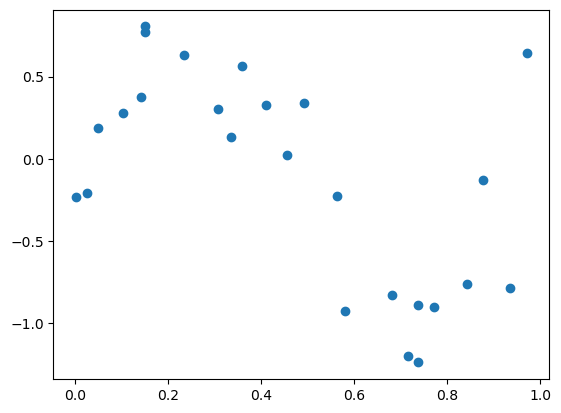

In [2]:
data = np.array([
    0.001399613, -0.23436656,
    0.971629779,  0.64689524,
    0.579119475, -0.92635765,
    0.335693937,  0.13000706,
    0.736736086, -0.89294863,
    0.492572335,  0.33854780,
    0.737133774, -1.24171910,
    0.563693769, -0.22523318,
    0.877603280, -0.12962722,
    0.141426545,  0.37632006,
    0.307203910,  0.30299077,
    0.024509308, -0.21162739,
    0.843665029, -0.76468719,
    0.771206067, -0.90455412,
    0.149670258,  0.77097952,
    0.359605608,  0.56466366,
    0.049612895,  0.18897607,
    0.409898906,  0.32531750,
    0.935457898, -0.78703491,
    0.149476207,  0.80585375,
    0.234315216,  0.62944986,
    0.455297119,  0.02353327,
    0.102696671,  0.27621694,
    0.715372314, -1.20379729,
    0.681745393, -0.83059624 ]).reshape(25,2)
y = data[:,1]
X = data[:,0:1]

plt.scatter(X[:,0], y)
plt.show()

---
# 1.1 Polynomial features
---
The function *compute_polynomial_features* takes as input a vector $x \in \mathbb{R}^n$ and returns a matrix $F$ of $p$ features, where column $k$ corresponds to $x^{k-1}$, $k = 1, 2, \dots, p$

In [4]:
import math

def compute_polynomial_features(X, degree):
    # degree = p+1
    x = X if len(X.shape) == 1 else X[:,0]
    # Complete the implementation
    F = np.zeros((len(x),degree+1))
    
    for i, d in enumerate(x):
        if i <= degree:
            F[:,i] = pow(x, i)
        
    return F

compute_polynomial_features(X, 3)
#if p value or degree is 3, then the matrix is supposed to be 4)

array([[1.00000000e+00, 1.39961300e-03, 1.95891655e-06, 2.74172507e-09],
       [1.00000000e+00, 9.71629779e-01, 9.44064427e-01, 9.17281111e-01],
       [1.00000000e+00, 5.79119475e-01, 3.35379366e-01, 1.94224723e-01],
       [1.00000000e+00, 3.35693937e-01, 1.12690419e-01, 3.78294905e-02],
       [1.00000000e+00, 7.36736086e-01, 5.42780060e-01, 3.99885657e-01],
       [1.00000000e+00, 4.92572335e-01, 2.42627505e-01, 1.19511597e-01],
       [1.00000000e+00, 7.37133774e-01, 5.43366201e-01, 4.00533578e-01],
       [1.00000000e+00, 5.63693769e-01, 3.17750665e-01, 1.79114070e-01],
       [1.00000000e+00, 8.77603280e-01, 7.70187517e-01, 6.75919091e-01],
       [1.00000000e+00, 1.41426545e-01, 2.00014676e-02, 2.82873846e-03],
       [1.00000000e+00, 3.07203910e-01, 9.43742423e-02, 2.89921362e-02],
       [1.00000000e+00, 2.45093080e-02, 6.00706179e-04, 1.47228927e-05],
       [1.00000000e+00, 8.43665029e-01, 7.11770681e-01, 6.00496032e-01],
       [1.00000000e+00, 7.71206067e-01, 5.94758798e

---
# 1.2 Polynomial regression
---

We estimate the parameters $\theta$ of our (polynomial) regression model using $\ell_2$-penalized ordinary least squares (ridge regression):
$$
    \hat{\theta} = \mathrm{argmin}_\theta \left\Vert y - F \theta \right\Vert_2^2 + \alpha \left\Vert \theta \right\Vert_2^2
$$
which has the following analytical solution
$$
    \hat{\theta} = (F^\top F + \alpha I)^{-1} F^\top y
$$
The class *PolynomialRegression* implements this estimator:

In [4]:
class PolynomialRegression:
    def __init__(self, degree=1, alpha=0.0):
        self.degree = degree
        self.theta  = None
        self.alpha  = alpha
    
    def fit(self, X, y):
        # Please use *np.linalg.pinv* to compute matrix inverses
        #fit to get the theta
        #θ(λ) = (X⊤X + λI)−1X⊤y
        F = compute_polynomial_features(X, self.degree)
        
        m, n = F.shape
        a_id = self.alpha * np.identity(n)
        f_ = np.dot(F.T, F)
        #print(f_)
        inverse = np.linalg.pinv(f_ + a_id)
        self.theta  = np.dot(np.dot(inverse, F.T), y)
        #print(self.theta)

    def predict(self, X):#once i get theta, i  need to predict to get the y hat
        # Complete the implementation
        F = compute_polynomial_features(X, self.degree)
        y_hat = np.dot(F, self.theta)
        return y_hat

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

    def get_params(self, deep=True):
        return {"degree" : self.degree, "alpha" : self.alpha}

Two approach
kernel = F.F^T. F is polynomial matrix. this is ridge <br>
K = (x_i^T x_j + 1)^p . This is X before it becomes F. this preferred when X is very large. this is kernel ridge.

In [5]:
reg = PolynomialRegression(3, alpha=0)
reg.fit(X, y)

---
# 1.3 Performance of polynomial regression
---

The following shows a simple fit of a polynomial model on the entire data set:

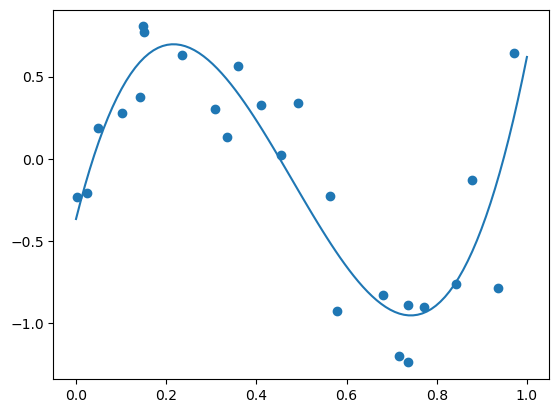

In [6]:
reg = PolynomialRegression(3, alpha=0)
reg.fit(X, y)

x_test = np.linspace(0,1,100)
plt.plot(x_test, reg.predict(x_test))
plt.scatter(X[:,0], y)
plt.show()

Now we test the performance of the polynomial regression model using *Leave One Out CV* (LOO-CV). We use $\alpha = 0.0$ and test all degrees from $1$ up to $10$. The result should show for each degree the average *mean squared error* (MSE):

In [7]:
# Use GridSearchCV to implement LOO-CV parameter evaluation. Plot the result and draw a vertical line at the optimal parameters (degree).
def cross_validation(t, deg_from, deg_to):
    param_grid = {'degree': np.arange(deg_from, deg_to+1)}
    
    if t == 'kernel' :
        model = KernelPolynomialRegression(alpha=0.0)
    else:
        model = PolynomialRegression(alpha=0.0)
        
    loo = LeaveOneOut()
    scoring = 'neg_mean_squared_error'

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=loo, scoring=scoring)
    grid_search.fit(X, y)

    results = grid_search.cv_results_

    for mean, std, params in zip(results['mean_test_score'], results['std_test_score'], results['params']):
        print(f"Degree: {params['degree']} - MSE: {-mean:.4f} (Std: {std:.4f})")
    return params['degree'], results['mean_test_score'], results['std_test_score']

cross_validation('', 1, 10)

Degree: 1 - MSE: 0.7216 (Std: 0.8755)
Degree: 2 - MSE: 0.7574 (Std: 0.8793)
Degree: 3 - MSE: 0.4643 (Std: 0.3830)
Degree: 4 - MSE: 0.4339 (Std: 0.3373)
Degree: 5 - MSE: 0.4315 (Std: 0.3298)
Degree: 6 - MSE: 0.4631 (Std: 0.3811)
Degree: 7 - MSE: 0.5106 (Std: 0.3869)
Degree: 8 - MSE: 0.4256 (Std: 0.3335)
Degree: 9 - MSE: 0.4248 (Std: 0.3340)
Degree: 10 - MSE: 0.4169 (Std: 0.3317)


(10,
 array([-0.72161189, -0.7574405 , -0.46433733, -0.43389674, -0.43150362,
        -0.46311593, -0.51063683, -0.42556694, -0.42481827, -0.41685709]),
 array([0.87552172, 0.87932367, 0.38304236, 0.3372716 , 0.32980934,
        0.38107628, 0.38692053, 0.3335026 , 0.33401908, 0.3317172 ]))

---
# 1.4 Polynomial kernel regression
---

The *KernelPolynomialRegression* class implements the corresponding kernel version of our polynomial regression model.

In [8]:
class KernelPolynomialRegression:
    def __init__(self, degree=1, alpha=0.0):
        self.degree = degree
        self.eta    = None
        self.alpha  = alpha
        self.F      = None
    
    def fit(self, X, y):
        # Please use *np.linalg.pinv* to compute matrix inverses
        K = ((X @ X.T) + 1) ** self.degree
        I = np.identity(K.shape[0])
        self.eta = np.linalg.pinv(K + (self.alpha * I)) @ y
        self.F = X

    def predict(self, X):
        # Complete the implementation
        X = X.reshape(len(X),1)
        K = ((X @ self.F.T) + 1) ** self.degree
        
        self.eta = self.eta.reshape(len(self.eta),1)
        y_hat = K @ self.eta 
        
        return y_hat
        

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

    def get_params(self, deep=True):
        return {"degree" : self.degree, "alpha" : self.alpha}

In [9]:
reg1 = KernelPolynomialRegression(10, alpha=0.0)
reg1.fit(X, y)
x_test = np.linspace(0,1,100)
pred = reg1.predict(x_test)
#print('pred.shape',pred)

The folloging shows a comparison of the the polynomal regression and the kernel version:

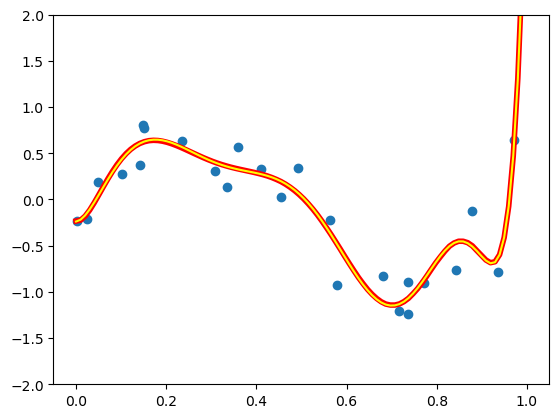

In [10]:
reg1 = KernelPolynomialRegression(10, alpha=0.0)
reg1.fit(X, y)
reg2 = PolynomialRegression(10, alpha=0.0)
reg2.fit(X, y)

x_test = np.linspace(0,1,100)
plt.plot(x_test, reg1.predict(x_test), color='red', linewidth=4.0)
plt.plot(x_test, reg2.predict(x_test), color='yellow')
plt.scatter(X[:,0], y)
plt.ylim(-2,2)
plt.show()

---
# 1.5 Performance comparison of polynomial kernel regression
---

We compare the performance of the kernel regression model to standard polynomial regression using LOO-CV. We use $\alpha = 0.0$ and test all degrees from $1$ up to $20$. Plot for both methods and each degree the average *mean squared error* (MSE):

In [11]:
# Use GridSearchCV to implement LOO-CV parameter evaluation. Plot the result and draw a vertical line at the optimal parameters (degree).
deg_poly, poly_test_score, std_poly  = cross_validation('', 1, 20)
deg_kern, kern_test_score, std_kern = cross_validation('kernel', 1, 20)

Degree: 1 - MSE: 0.7216 (Std: 0.8755)
Degree: 2 - MSE: 0.7574 (Std: 0.8793)
Degree: 3 - MSE: 0.4643 (Std: 0.3830)
Degree: 4 - MSE: 0.4339 (Std: 0.3373)
Degree: 5 - MSE: 0.4315 (Std: 0.3298)
Degree: 6 - MSE: 0.4631 (Std: 0.3811)
Degree: 7 - MSE: 0.5106 (Std: 0.3869)
Degree: 8 - MSE: 0.4256 (Std: 0.3335)
Degree: 9 - MSE: 0.4248 (Std: 0.3340)
Degree: 10 - MSE: 0.4169 (Std: 0.3317)
Degree: 11 - MSE: 0.4172 (Std: 0.3415)
Degree: 12 - MSE: 0.4175 (Std: 0.3381)
Degree: 13 - MSE: 0.4484 (Std: 0.3491)
Degree: 14 - MSE: 0.5131 (Std: 0.4352)
Degree: 15 - MSE: 0.4876 (Std: 0.3742)
Degree: 16 - MSE: 0.4701 (Std: 0.3485)
Degree: 17 - MSE: 0.4573 (Std: 0.3389)
Degree: 18 - MSE: 0.4529 (Std: 0.3325)
Degree: 19 - MSE: 0.4496 (Std: 0.3344)
Degree: 20 - MSE: 0.4465 (Std: 0.3348)
Degree: 1 - MSE: 0.3407 (Std: 0.5111)
Degree: 2 - MSE: 0.4183 (Std: 0.7521)
Degree: 3 - MSE: 0.1250 (Std: 0.2048)
Degree: 4 - MSE: 0.1323 (Std: 0.2196)
Degree: 5 - MSE: 0.1664 (Std: 0.2930)
Degree: 6 - MSE: 0.3179 (Std: 0.8884)
D

In [12]:
poly_idx = np.arange(1,deg_poly+1)
kern_idx = np.arange(1, deg_kern+1)
print(poly_idx)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


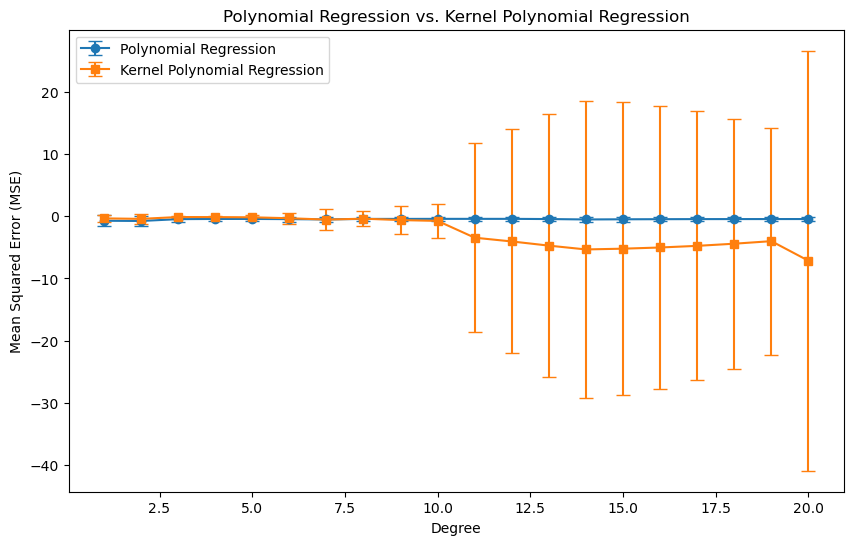

In [13]:
plt.figure(figsize=(10,6))
plt.errorbar(poly_idx, poly_test_score, yerr = std_poly, fmt='-o', label='Polynomial Regression', capsize = 5)
plt.errorbar(kern_idx, kern_test_score, yerr = std_kern, fmt='-s', label='Kernel Polynomial Regression', capsize = 5)
plt.xlabel('Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Polynomial Regression vs. Kernel Polynomial Regression')
#plt.xscale('log')
plt.legend()
plt.show()

---
# 1.5 Performance comparison of polynomial kernel regression with penalty
---

We fix the maximum degree to 15 and now test several penalty strengths, i.e.
$$
    \alpha = 0.001, 0.005, 0.01, 0.02, 0.05, 0.1
$$
Plot the performance of both polynomial and polynomial kernel regression using LOO-CV and MSE as error measure.

In [14]:
def cross_validation_penalty(t, alpha):
    param_grid = {'alpha': alpha}

    if t == 'kernel' :
        model = KernelPolynomialRegression(degree=15)
    else:
        model = PolynomialRegression(degree=15)

    loo = LeaveOneOut()
    scoring = 'neg_mean_squared_error'

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=loo, scoring=scoring)
    grid_search.fit(X, y)

    results = grid_search.cv_results_

    for mean, std, params in zip(results['mean_test_score'], results['std_test_score'], results['params']):
        print(f"Alpha: {params['alpha']} - MSE: {-mean:.4f} (Std: {std:.4f})")
    return results['mean_test_score'], results['std_test_score']

        
alpha = [0.001, 0.005, 0.01,0.02, 0.05, 0.1]
print('\nPolynomial Regression: ')
mse, std_test_score = cross_validation_penalty('', alpha)

print('\nKernel Polynomial Regression: ')
k_mse, k_std_test_score = cross_validation_penalty('kernel', alpha)



Polynomial Regression: 
Alpha: 0.001 - MSE: 0.4123 (Std: 0.3586)
Alpha: 0.005 - MSE: 0.4393 (Std: 0.4597)
Alpha: 0.01 - MSE: 0.4712 (Std: 0.5306)
Alpha: 0.02 - MSE: 0.5163 (Std: 0.6104)
Alpha: 0.05 - MSE: 0.5840 (Std: 0.7090)
Alpha: 0.1 - MSE: 0.6294 (Std: 0.7674)

Kernel Polynomial Regression: 
Alpha: 0.001 - MSE: 0.5973 (Std: 2.1530)
Alpha: 0.005 - MSE: 0.5328 (Std: 1.8232)
Alpha: 0.01 - MSE: 0.4833 (Std: 1.5993)
Alpha: 0.02 - MSE: 0.4391 (Std: 1.4069)
Alpha: 0.05 - MSE: 0.4010 (Std: 1.2460)
Alpha: 0.1 - MSE: 0.3838 (Std: 1.1691)


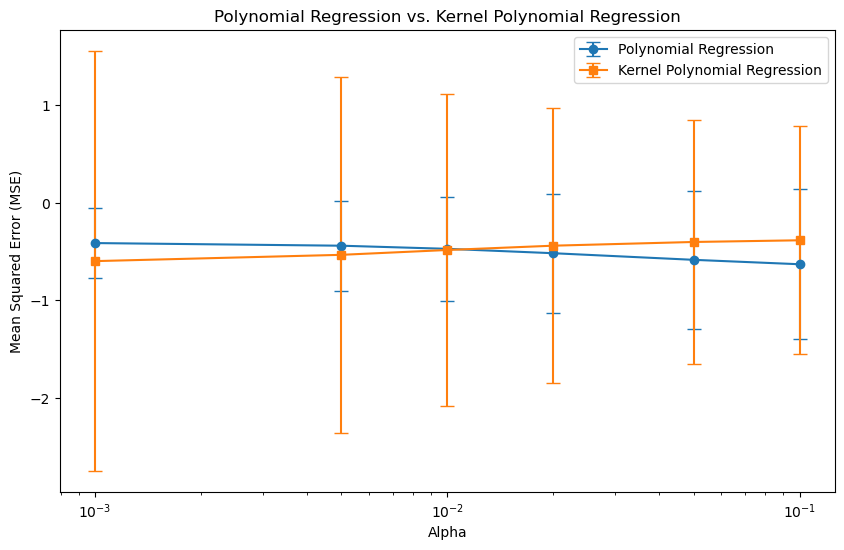

In [15]:
plt.figure(figsize=(10,6))
plt.errorbar(alpha, mse, yerr = std_test_score, fmt='-o', label='Polynomial Regression', capsize = 5)
plt.errorbar(alpha, k_mse, yerr = k_std_test_score, fmt='-s', label='Kernel Polynomial Regression', capsize = 5)
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Polynomial Regression vs. Kernel Polynomial Regression')
plt.xscale('log')
plt.legend()
plt.show()

---
# Assignment 2: Prediction of gene expression from promoter sequences
---
### Import data
---

For importing the gene expression data, please make sure that you have an up to date version of pandas installed. We used version *1.4.2* for preparing the data. If this conflicts with your python environment, you might try to use a separate *conda environment* for our excercises.

In [16]:
path_to_training_file = 'exercise-07-data/gene_expression_liver_featurized.pkl.gz'

with gzip.open(path_to_training_file, 'rb') as f:
    X_raw, y_raw = pickle.load(f)

# Reduce data size
X_raw = X_raw[0:5000]
y_raw = y_raw[0:5000]

---
### Outlier removal and normalization
---

In [17]:
y_threshold = 10000

X = StandardScaler().fit_transform(X_raw[y_raw < y_threshold])
y = np.log(1.0 + y_raw[y_raw < y_threshold])

---
### Histogram
---

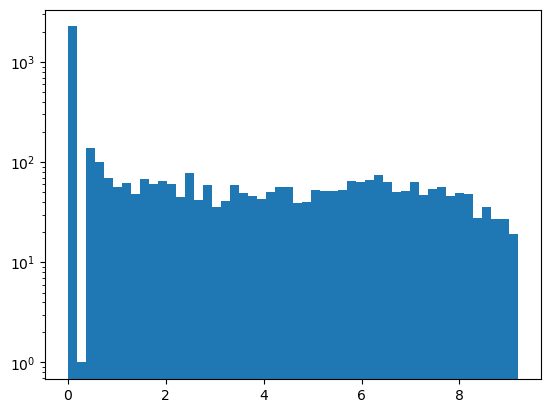

In [18]:
plt.hist(y, bins=50)
plt.yscale('log')
plt.show()

---
## 2.1 Performance of linear regression
---

As a first example, we evaluate the performance of a linear regression model. Please use *LinearRegression* from scikit-learn. We use the *KFold* class of scikit-learn to implement 5-fold CV with random shuffling of the data $(X, y)$ and a random state of 42 (in order to obtain comparable results). The final result should show the average $R^2$ over all 5 CV folds.

In [19]:
model = LinearRegression()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
    ss_residual = np.sum((y_test - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    
    r2_scores.append(r2)

average_r2 = np.mean(r2_scores)

print('Average R^2 score over 5 CV folds:', average_r2)


Average R^2 score over 5 CV folds: 0.13830741803336152


---
## 2.2 Performance of kernel regression
---

We now turn our attention to kernel regression and make use of the implementation in scikit-learn. We use the *KernelRidge* regressor in combination with the *rbf* kernel and keep $\gamma = 0.001$ fixed. The parameter $\alpha$ will be subject to optimization, for which we use *GridSearchCV* to test the following parameter values $\alpha = 0, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3$. The training procedure of kernel regression is too expensive for a fully-fledged k-fold CV. Instead, we use *ShuffleSplit* with only two splits, a training size of $1000$ samples and a random state of 42.

In [20]:
model = KernelRidge(kernel='rbf', gamma=0.001)

param_grid = {'alpha': [0, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3]}

cv = ShuffleSplit(n_splits=2, train_size=1000, random_state=42)

grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='r2')

grid_search.fit(X, y)

print('Best alpha: ', grid_search.best_params_['alpha'])
print('Best R^2 score:',grid_search.best_score_)


Best alpha:  1.5
Best R^2 score: 0.12522837948424193
